## Tools

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## Dataset

In [10]:
data = pd.read_csv("../data/01-modified-data/combined_data_clean.csv")
data

,Site,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Verbal IQ,Performance IQ,Full4 IQ
0,6.0,0.0,10.42,0.96,1.0,1.0,44.615385,115.038462,107.192308,104.0
1,6.0,1.0,10.67,1.00,1.0,1.0,44.615385,115.038462,107.192308,136.0
2,6.0,1.0,11.75,1.00,0.0,1.0,44.615385,115.038462,107.192308,104.0
3,6.0,1.0,11.08,1.00,3.0,1.0,44.615385,115.038462,107.192308,112.0
4,6.0,0.0,11.33,1.00,1.0,1.0,44.615385,115.038462,107.192308,120.0
...,...,...,...,...,...,...,...,...,...,...
157,1.0,0.0,9.92,0.96,0.0,0.0,35.000000,107.000000,124.000000,117.0
158,1.0,1.0,11.42,0.96,0.0,0.0,-999.000000,130.000000,127.000000,132.0
159,1.0,0.0,11.58,0.96,0.0,0.0,23.000000,123.000000,111.000000,119.0
160,1.0,1.0,11.83,0.96,0.0,0.0,31.000000,129.000000,120.000000,128.0


In [11]:
#FEATURE SELECTION
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from itertools import combinations

sel_col = ["Site","Gender","Age","Handedness","DX","ADHD Index","Verbal IQ","Performance IQ","Full4 IQ"]
x = data[sel_col]
print(x)
y = data["ADHD Measure"]


X = x


from sklearn.datasets import load_iris
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize variables to keep track of the best feature subset and its accuracy
best_feature_subset = None
best_accuracy = 0.0

# Iterate over different feature subset sizes (1 to the number of features)
for num_features in range(1, X.shape[1] + 1):
    # Generate all possible combinations of features
    feature_combinations = list(combinations(range(X.shape[1]), num_features))
    
    for feature_indices in feature_combinations:
        # Select the subset of features using array slicing
        X_train_subset = X_train[:, feature_indices]
        X_test_subset = X_test[:, feature_indices]

        # Train a Naive Bayes model
        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train_subset, y_train)

        # Make predictions on the test set
        y_pred = nb_classifier.predict(X_test_subset)

        # Evaluate the model using accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if the current subset of features gives a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_subset = feature_indices

print("Best feature subset:", best_feature_subset)
print("Best accuracy:", best_accuracy)



     Site  Gender    Age  Handedness   DX  ADHD Index   Verbal IQ  \
0     6.0     0.0  10.42        0.96  1.0   44.615385  115.038462   
1     6.0     1.0  10.67        1.00  1.0   44.615385  115.038462   
2     6.0     1.0  11.75        1.00  0.0   44.615385  115.038462   
3     6.0     1.0  11.08        1.00  3.0   44.615385  115.038462   
4     6.0     0.0  11.33        1.00  1.0   44.615385  115.038462   
..    ...     ...    ...         ...  ...         ...         ...   
157   1.0     0.0   9.92        0.96  0.0   35.000000  107.000000   
158   1.0     1.0  11.42        0.96  0.0 -999.000000  130.000000   
159   1.0     0.0  11.58        0.96  0.0   23.000000  123.000000   
160   1.0     1.0  11.83        0.96  0.0   31.000000  129.000000   
161   1.0     1.0  11.33        0.96  0.0   24.000000  128.000000   

     Performance IQ  Full4 IQ  
0        107.192308     104.0  
1        107.192308     136.0  
2        107.192308     104.0  
3        107.192308     112.0  
4        10

In [12]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:7,:])

num_selected_features = features.shape[1]
print("Number of selected features:", num_selected_features)

num_rows = features.shape[0]
print("Number of rows in features:", num_rows)

[4.331 1.077 0.934 1.179 1.17  3.544 1.868 3.45 ]
[[  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]
 [  6.      1.     44.615 115.038]]
Number of selected features: 4
Number of rows in features: 162


In [13]:
# Assuming you have the original data DataFrame and feature names
original_data = pd.DataFrame(data, columns=['Site', 'DX','Verbal IQ', 'ADHD Index'])

# Get the names of the selected features (assuming feature_names is a list)
selected_feature_names = [original_data.columns[i] for i in range(num_selected_features)]

# Create a new DataFrame with the selected features
selected_data = pd.DataFrame(features, columns=selected_feature_names)
print(selected_data)

     Site   DX   Verbal IQ  ADHD Index
0     6.0  1.0   44.615385  115.038462
1     6.0  1.0   44.615385  115.038462
2     6.0  1.0   44.615385  115.038462
3     6.0  1.0   44.615385  115.038462
4     6.0  1.0   44.615385  115.038462
..    ...  ...         ...         ...
157   1.0  0.0   35.000000  107.000000
158   1.0  0.0 -999.000000  130.000000
159   1.0  0.0   23.000000  123.000000
160   1.0  0.0   31.000000  129.000000
161   1.0  0.0   24.000000  128.000000

[162 rows x 4 columns]


In [14]:
sel_col = ["Site","DX","Verbal IQ","ADHD Index"]
x = data[sel_col]
print(x)
y = data["ADHD Measure"]

     Site   DX   Verbal IQ  ADHD Index
0     6.0  1.0  115.038462   44.615385
1     6.0  1.0  115.038462   44.615385
2     6.0  0.0  115.038462   44.615385
3     6.0  3.0  115.038462   44.615385
4     6.0  1.0  115.038462   44.615385
..    ...  ...         ...         ...
157   1.0  0.0  107.000000   35.000000
158   1.0  0.0  130.000000 -999.000000
159   1.0  0.0  123.000000   23.000000
160   1.0  0.0  129.000000   31.000000
161   1.0  0.0  128.000000   24.000000

[162 rows x 4 columns]


In [15]:
data.dtypes

Site              float64
Gender            float64
Age               float64
Handedness        float64
DX                float64
ADHD Measure      float64
ADHD Index        float64
Verbal IQ         float64
Performance IQ    float64
Full4 IQ          float64
dtype: object

In [16]:
data.isna().sum()

Site              0
Gender            0
Age               0
Handedness        0
DX                0
ADHD Measure      0
ADHD Index        0
Verbal IQ         0
Performance IQ    0
Full4 IQ          0
dtype: int64

## Basic EDA

<Axes: >

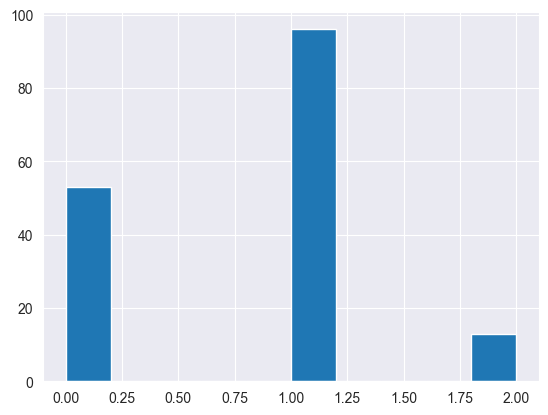

In [17]:
data["ADHD Measure"].hist()

<Axes: >

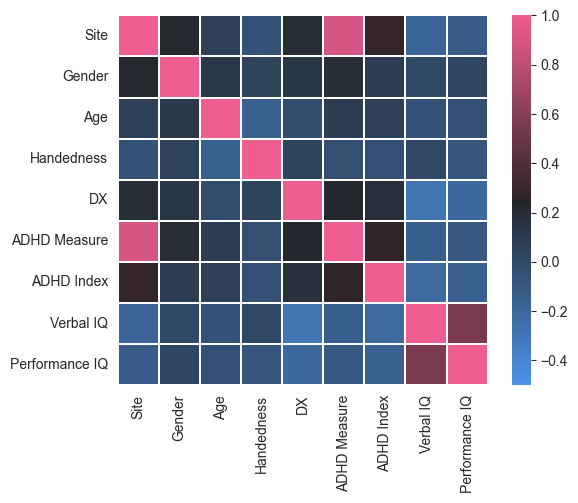

In [18]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [19]:
data.columns
data = data[["Site","DX","Verbal IQ","ADHD Index","ADHD Measure"]]
data.head(10)

,Site,DX,Verbal IQ,ADHD Index,ADHD Measure
0,6.0,1.0,115.038462,44.615385,1.0
1,6.0,1.0,115.038462,44.615385,1.0
2,6.0,0.0,115.038462,44.615385,1.0
3,6.0,3.0,115.038462,44.615385,1.0
4,6.0,1.0,115.038462,44.615385,1.0
5,6.0,0.0,115.038462,44.615385,1.0
6,6.0,0.0,115.038462,44.615385,1.0
7,6.0,0.0,115.038462,44.615385,1.0
8,6.0,0.0,115.038462,44.615385,1.0
9,6.0,0.0,115.038462,44.615385,1.0


<Axes: xlabel='Verbal IQ', ylabel='Count'>

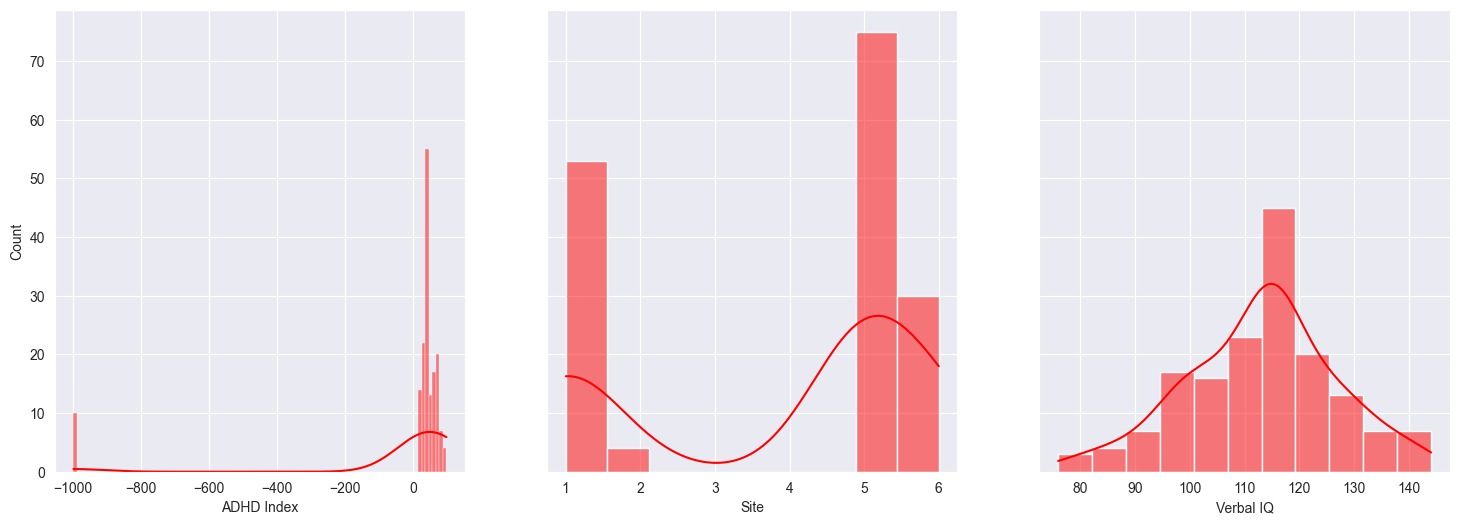

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="ADHD Index", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Site", kde=True, color='r')
sns.histplot(data, ax=axes[2], x="Verbal IQ", kde=True, color='r')
#sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
#sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)


## Calculate P(Y=y) for all possible y

In [21]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [22]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [23]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Gaussian model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, f1_score
train, test = train_test_split(data, test_size=.2, random_state=42)

#X_test = test.iloc[:,:-1].values
sel_col = ["Site","DX","Verbal IQ","ADHD Index"]
X_test = test[sel_col].values

Y_test = test[["ADHD Measure"]].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="ADHD Measure")


print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred,average = 'macro'))


# Assuming you have y_true (true labels) and y_pred (model predictions)
precision = precision_score(Y_test, Y_pred,average = 'macro')

print("Precision:", precision)


# Assuming you have y_true (true labels) and y_pred (model predictions)
recall = recall_score(Y_test, Y_pred,average = 'macro')

print("Recall:", recall)


from sklearn.metrics import accuracy_score

# Assuming you have two lists or arrays: y_true (true labels) and y_pred (predicted labels)
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

[[ 8  0  0]
 [19  0  0]
 [ 6  0  0]]
0.13008130081300814
Precision: 0.08080808080808081
Recall: 0.3333333333333333
Accuracy: 0.24


/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_31781/1619075566.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_31781/1619075566.py:5: RuntimeWarning: invalid value encountered in scalar divide
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
/var/folders/bd/fz7166695vq0bg9w400f8zl40000gn/T/ipykernel_31781/1619075566.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

ValueError: multiclass format is not supported

## Convert continuous features to Categorical features

In [ ]:

data["cat_site"] = pd.cut(data["Site"].values, bins = 3, labels = [0,1,2])
data["cat_dx"] = pd.cut(data["DX"].values, bins = 3, labels = [0,1,2])
data["cat_index"] = pd.cut(data["ADHD Index"].values, bins = 3, labels = [0,1,2])
data["cat_viq"] = pd.cut(data["Verbal IQ"].values, bins = 3, labels = [0,1,2])

data = data.drop(columns=["Site","DX","Verbal IQ","ADHD Index"])
data = data[["cat_site","cat_dx","cat_viq","cat_index","ADHD Measure"]]
data.head(10)

## Approach 2: Calculate P(X=x|Y=y) categorically

In [ ]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [ ]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

## Test Categorical model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

#X_test = test.iloc[:,:-1].values
sel_col = ["cat_site","cat_dx","cat_viq","cat_index"]
X_test = test[sel_col].values

Y_test = test[["ADHD Measure"]].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="ADHD Measure")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print("f1 score: ",f1_score(Y_test, Y_pred, average = "macro"))





# Assuming you have y_true (true labels) and y_pred (model predictions)
precision = precision_score(Y_test, Y_pred,average = 'macro')

print("Precision:", precision)


# Assuming you have y_true (true labels) and y_pred (model predictions)
recall = recall_score(Y_test, Y_pred,average = 'macro')

print("Recall:", recall)

# Assuming you have two lists or arrays: y_true (true labels) and y_pred (predicted labels)
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')